# Exploratory Data Analysis - Sports


Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’\
As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.\
Suggest teams or players a company should endorse for its products.

By - Divya Gautam

In [149]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
#importing dataset matches
ipl_m = pd.read_csv("C:\\Users\\pc\\Desktop\\nf\\matches.csv")
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [24]:
ipl_m.info()
ipl_m.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

(756, 18)

## Seasons we have got in the dataset

In [27]:
ipl_m['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

## Matches we have got in the dataset

In [28]:
ipl_m['id'].max()

11415

## matchs winned by teams

In [30]:
ipl_m['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

here we can see that **Mumbai Indians** won maximum matches **109** till 2019 followed by **Kings XI Punjab** with **91** matches least matches winned by **Delhi Capitals** with **6** matches

In [46]:
ipl_m['team1'].value_counts()+ipl_m['team2'].value_counts()

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [49]:
x= (ipl_m['winner'].value_counts()/(ipl_m['team1'].value_counts()+ipl_m['team2'].value_counts()))*100
x

Chennai Super Kings            60.975610
Deccan Chargers                38.666667
Delhi Capitals                 62.500000
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Kings XI Punjab                46.590909
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.685393
Mumbai Indians                 58.288770
Pune Warriors                  26.086957
Rajasthan Royals               51.020408
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.703704
dtype: float64

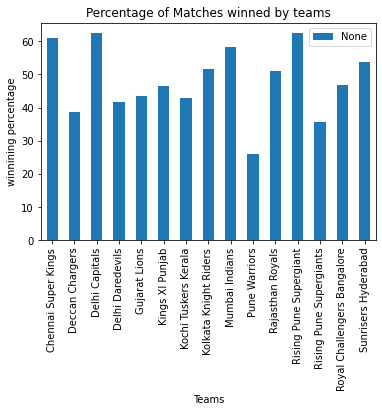

In [73]:
ax = x.plot(kind='bar')
ax.set_title('Percentage of Matches winned by teams')
ax.set_xlabel('Teams')
ax.set_ylabel('winnining percentage')
ax.legend()


Here we observe that Delhi Capitals and Rising Pune Supergiant winning percentage is highest as per the total no. of matches played by each team

In [38]:
grouped=ipl_m.groupby(["team1","team2"]).count()
grouped

id  season  city  date  \
team1               team2                                                 
Chennai Super Kings Deccan Chargers               8       8     8     8   
                    Delhi Capitals                1       1     1     1   
                    Delhi Daredevils             12      12    12    12   
                    Kings XI Punjab              11      11    11    11   
                    Kochi Tuskers Kerala          2       2     2     2   
...                                              ..     ...   ...   ...   
Sunrisers Hyderabad Pune Warriors                 2       2     2     2   
                    Rajasthan Royals              9       9     9     9   
                    Rising Pune Supergiant        1       1     1     1   
                    Rising Pune Supergiants       2       2     2     2   
                    Royal Challengers Bangalore   9       9     9     9   

                                                 toss_winner  toss_decision  \
team1               team2                                                     
Chennai Super Kings Deccan Chargers                        8              8   
                    Delhi Capitals                         1              1   
                    Delhi Daredevils                      12             12   
                    Kings XI Punjab                       11             11   
                    Kochi Tuskers Kerala                   2              2   
...                                                      ...            ...   
Sunrisers Hyderabad Pune Warriors                          2              2   
                    Rajasthan Royals                       9              9   
                    Rising Pune Supergiant                 1              1   
                    Rising Pune Supergiants                2              2   
                    Royal Challengers Bangalore            9              9   

                                                 result  dl_applied  winner  \
team1               team2                                                     
Chennai Super Kings Deccan Chargers                   8           8       8   
                    Delhi Capitals                    1           1       1   
                    Delhi Daredevils                 12          12      12   
                    Kings XI Punjab                  11          11      11   
                    Kochi Tuskers Kerala              2           2       2   
...                                                 ...         ...     ...   
Sunrisers Hyderabad Pune Warriors                     2           2       2   
                    Rajasthan Royals                  9           9       9   
                    Rising Pune Supergiant            1           1       1   
                    Rising Pune Supergiants           2           2       2   
                    Royal Challengers Bangalore       9           9       9   

                                                 win_by_runs  win_by_wickets  \
team1               team2                                                      
Chennai Super Kings Deccan Chargers                        8               8   
                    Delhi Capitals                         1               1   
                    Delhi Daredevils                      12              12   
                    Kings XI Punjab                       11              11   
                    Kochi Tuskers Kerala                   2               2   
...                                                      ...             ...   
Sunrisers Hyderabad Pune Warriors                          2               2   
                    Rajasthan Royals                       9               9   
                    Rising Pune Supergiant                 1               1   
                    Rising Pune Supergiants                2               2   
                    Royal Challengers Bangalore          

## Team won by Maximum Runs

In [75]:
ipl_m.iloc[ipl_m['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Mumbai Indians won by maximum runs

## Team won by Maximum Wickets

In [78]:
ipl_m.iloc[ipl_m['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## Team won by minimum runs

In [79]:
ipl_m.iloc[ipl_m[ipl_m['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

## Team won by Minimum Wickets

In [82]:
ipl_m.iloc[ipl_m[ipl_m['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

## Top Player of the match winners

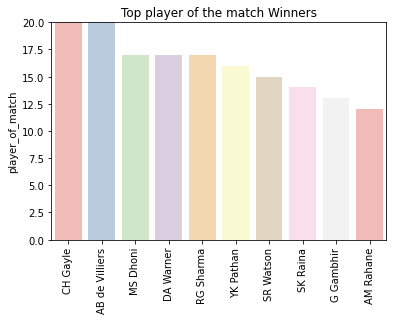

In [88]:
top_players = ipl_m.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Pastel1");
plt.show()

CH Gayle is the most Successful player in all match winners

## match of the man winner

In [98]:
 pom= ipl_m['player_of_match'].value_counts() 
pom

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
S Badrinath        1
SB Wagh            1
M Kartik           1
TL Suman           1
RP Singh           1
Name: player_of_match, Length: 226, dtype: int64

In [100]:
#top 5 player of the match
list(ipl_m['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'DA Warner', 'RG Sharma']

CH Gayle recieved 21 player of match award which is the maximum no. of times

## Toss Winners

In [101]:
ipl['toss_winner'].value_counts() 

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

## Win by runs

In [103]:
batting_first=ipl[ipl['win_by_runs']!=0] 
batting_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


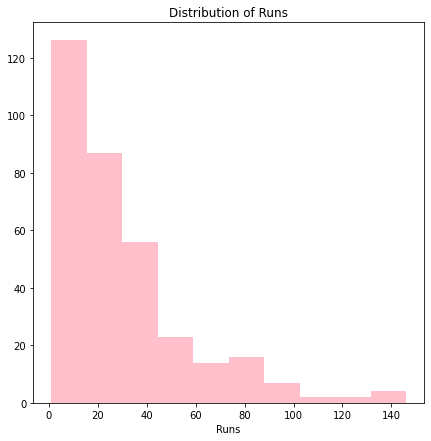

In [120]:
#visualising
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'], color=['pink'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

## team batting first

In [121]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

## wins by batting first

In [122]:
batting_first['winner'].value_counts().keys() 

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions'],
      dtype='object')

In [141]:
batting_first['winner'].value_counts()[0:3].keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab'], dtype='object')

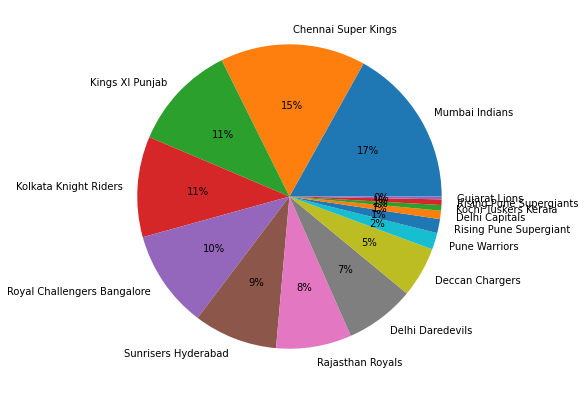

In [153]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%1.0f%%')
plt.show() 

We observe that CSK won maximum times by batting first

## Win by wickets

In [154]:
wicket=ipl_m[ipl_m['win_by_wickets']!=0] 

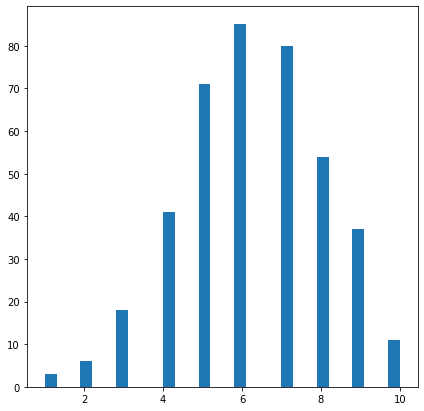

In [155]:
#visualising
plt.figure(figsize=(7,7))
plt.hist(wicket['win_by_wickets'],bins=30)
plt.show()

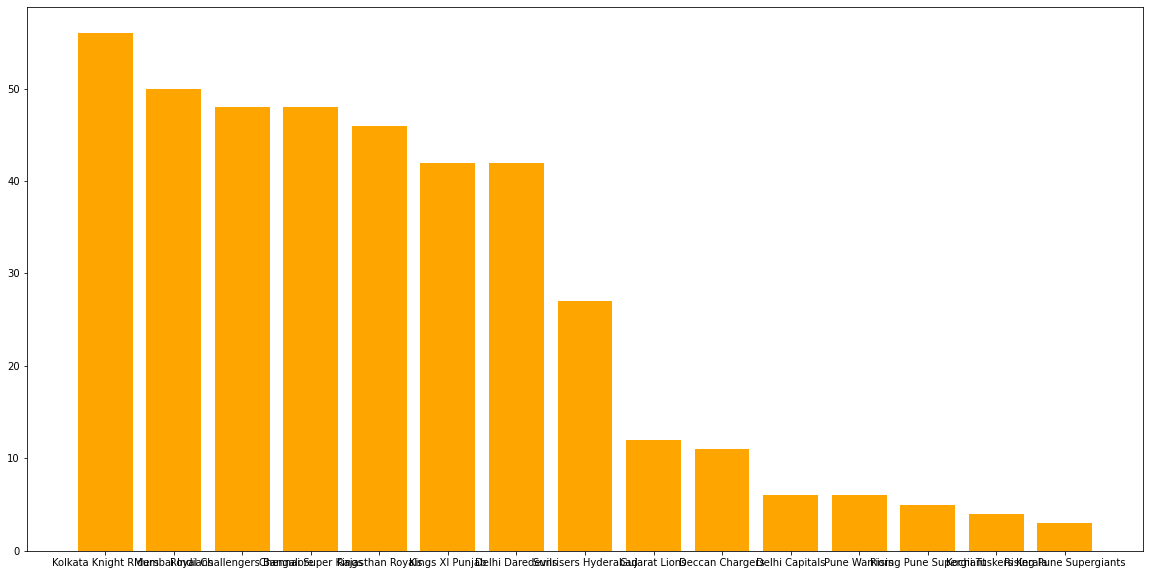

In [159]:
plt.figure(figsize=(20,10))
plt.bar(list(wicket['winner'].value_counts().keys()),list(wicket['winner'].value_counts()), color = ['orange'])
plt.show()

Hence we can observe that KKR won maximum times by batting second

## Inferences

Mumbai Indians won maximum matches 109\
Delhi Capitals and Rising Pune Supergiant winning percentage is highest as per the total no. of matches played by each team\
Mumbai Indians won by maximum runs\
Kolkata Knight Riders won by maximum wickets\
CH Gayle is the most Successful player and won 21 player of the match award followed by AB de Villiers, MS Dhoni,DA Warner,RG Sharma\
There is no such advantage or not a clear advantage which you can decipher from a team winning the toss and going ahead to win the match\
